In [32]:
import pandas as pd
import numpy as np

In [33]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("DLnz_NewLongerDriftEvalExp_MSEs_1024NPaths").replace(
            ".", "")
score_eval=pd.read_parquet(root_dir + extra_path+ "_score_MSE.parquet", engine="fastparquet")
nad_eval=pd.read_parquet(root_dir + extra_path+ "_nad_MSE.parquet")
nad_eval_true_law=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE.parquet")
score_eval_true_law=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE.parquet")
score_state_eval=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE.parquet")
nad_state_eval=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE.parquet")
stable_state_eval = (pd.concat([score_state_eval.rename({d:d+"Stable Score State" for d in score_state_eval.columns}, axis=1),nad_state_eval.rename({d:d+"Stable Nadaraya State" for d in score_state_eval.columns}, axis=1)], axis=1))
stable_true_law_eval = (pd.concat([score_eval_true_law.rename({d:d+"Stable Score True" for d in score_state_eval.columns}, axis=1),nad_eval_true_law.rename({d:d+"Stable Nadaraya True" for d in score_state_eval.columns}, axis=1)], axis=1))
stable_alt_law_eval = (pd.concat([score_eval.rename({d:d+"Stable Score" for d in score_state_eval.columns}, axis=1),nad_eval.rename({d:d+"Stable Nadaraya" for d in score_state_eval.columns}, axis=1)], axis=1))

In [34]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("DLnzChaos_NewLongerDriftEvalExp_MSEs_1024NPaths").replace(
            ".", "")
score_eval=pd.read_parquet(root_dir + extra_path+ "_score_MSE.parquet", engine="fastparquet")
nad_eval=pd.read_parquet(root_dir + extra_path+ "_nad_MSE.parquet")
nad_eval_true_law=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE.parquet")
score_eval_true_law=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE.parquet")
score_state_eval=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE.parquet")
nad_state_eval=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE.parquet")
chaos_state_eval = (pd.concat([score_state_eval.rename({d:d+"Chaos Score State" for d in score_state_eval.columns}, axis=1),nad_state_eval.rename({d:d+"Chaos Nadaraya State" for d in score_state_eval.columns}, axis=1)], axis=1))
chaos_true_law_eval = (pd.concat([score_eval_true_law.rename({d:d+"Chaos Score True" for d in score_state_eval.columns}, axis=1),nad_eval_true_law.rename({d:d+"Chaos Nadaraya True" for d in score_state_eval.columns}, axis=1)], axis=1))
chaos_alt_law_eval = (pd.concat([score_eval.rename({d:d+"Chaos Score" for d in score_state_eval.columns}, axis=1),nad_eval.rename({d:d+"Chaos Nadaraya" for d in score_state_eval.columns}, axis=1)], axis=1))

In [35]:
time_ax = np.linspace(1/256, 1/256*(chaos_alt_law_eval.shape[0]),chaos_alt_law_eval.shape[0])

In [36]:
true_law_eval = (pd.concat([chaos_true_law_eval, stable_true_law_eval], axis=1)).sort_index(axis=1).set_index(time_ax)

In [37]:
alt_law_eval =(pd.concat([chaos_alt_law_eval, stable_alt_law_eval], axis=1)).sort_index(axis=1).set_index(time_ax)

In [38]:
state_eval = (pd.concat([chaos_state_eval, stable_state_eval], axis=1)).iloc[1:, :].sort_index(axis=1).set_index(time_ax)

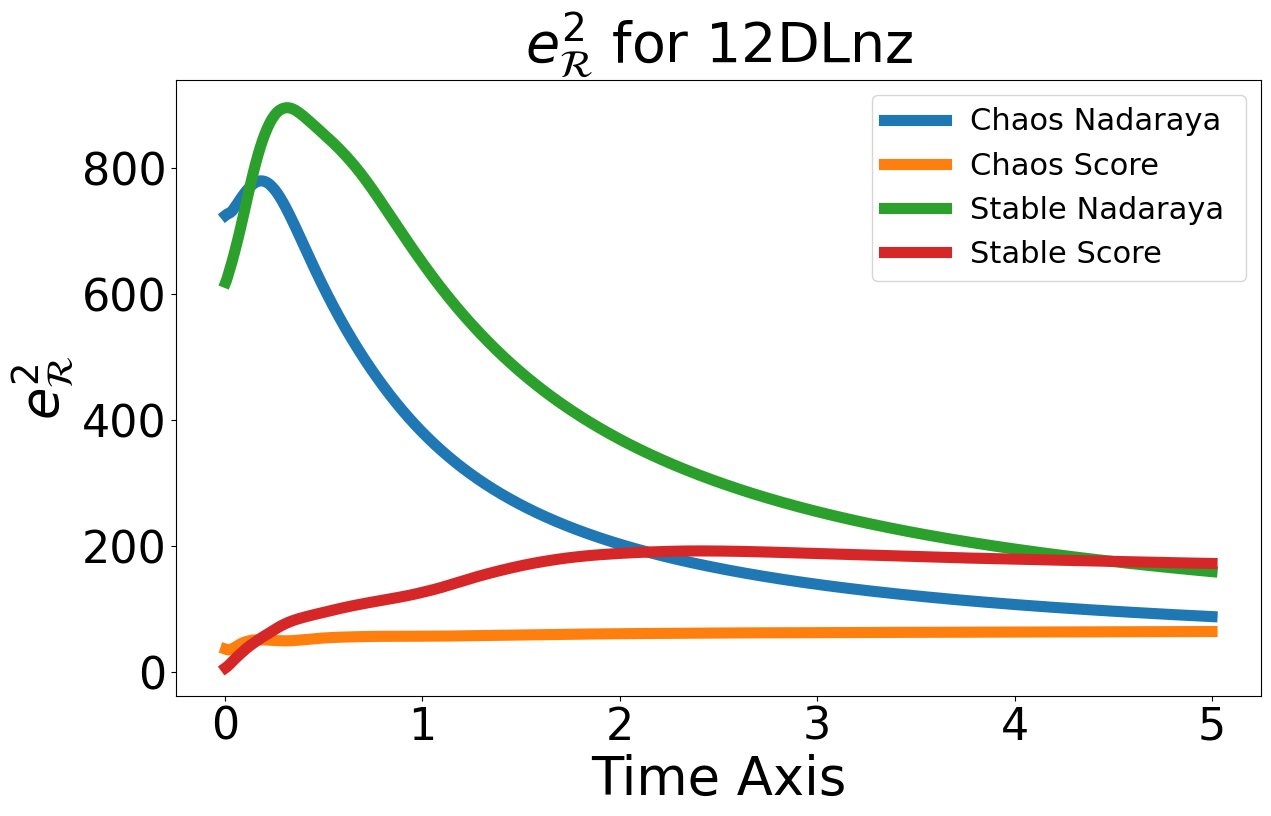

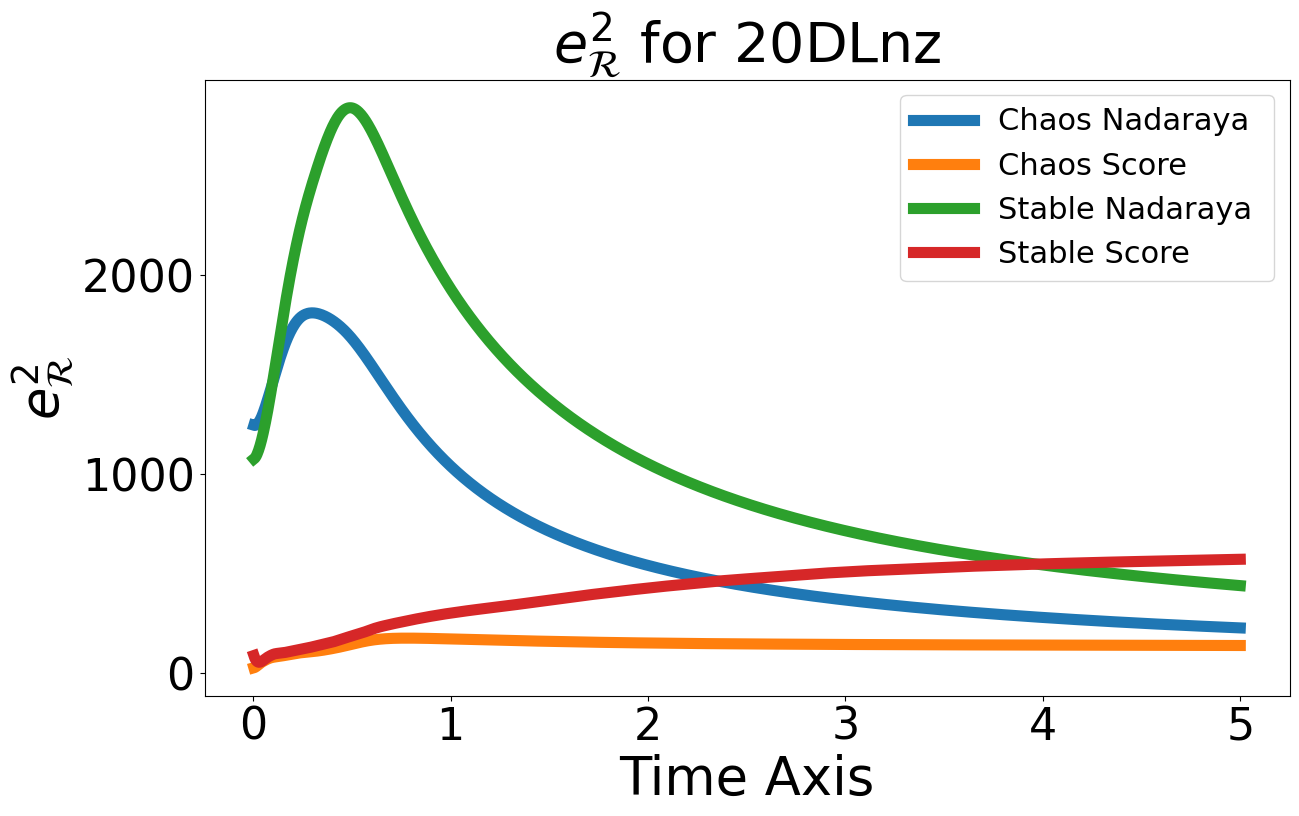

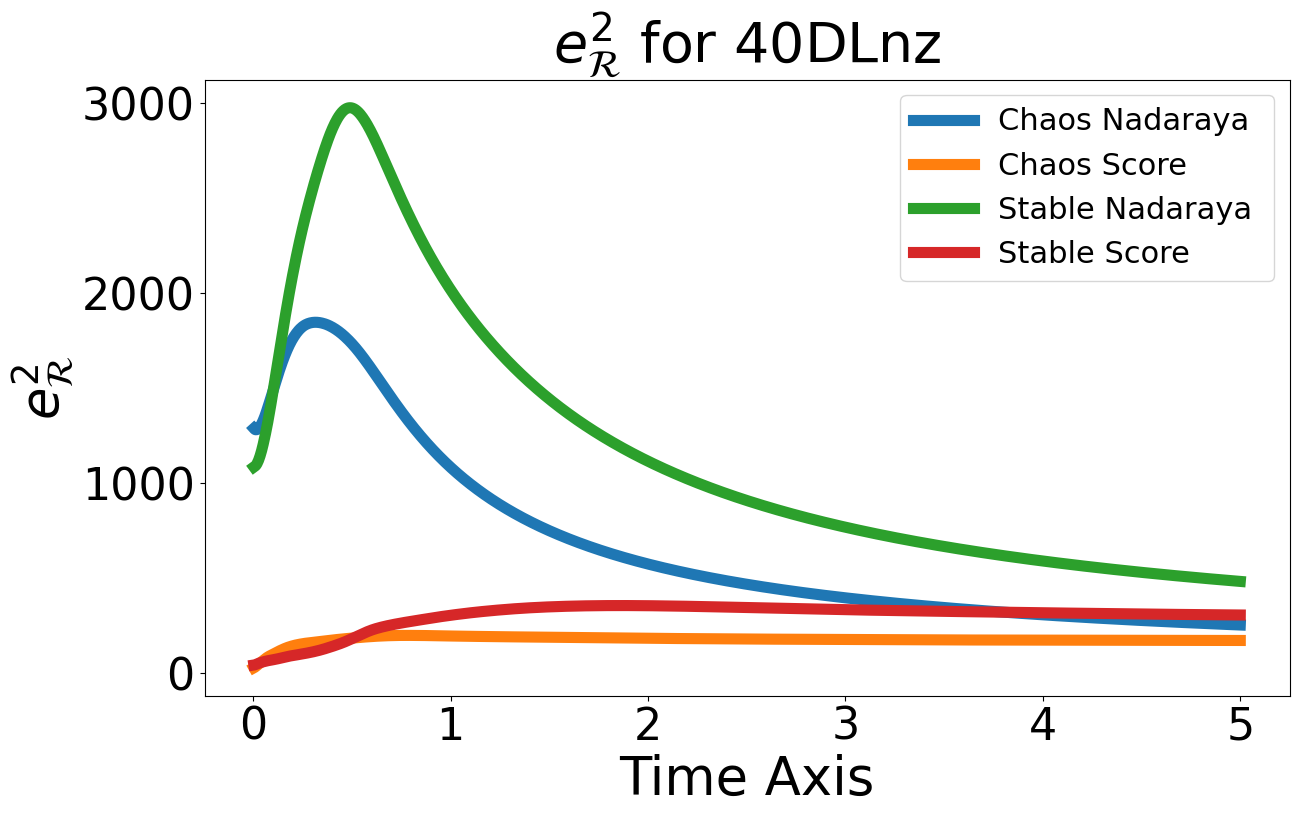

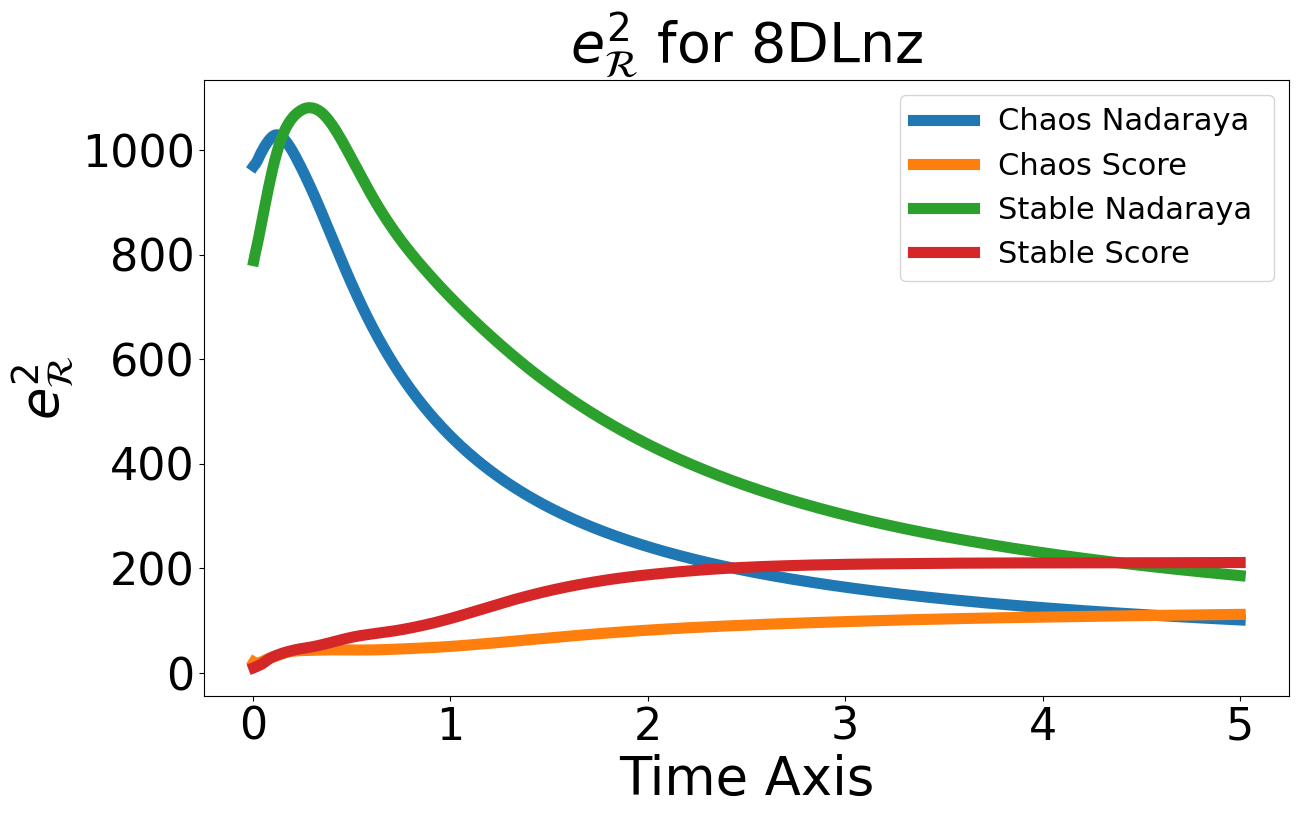

In [39]:
import matplotlib.pyplot as plt
for k in range(0, true_law_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(14, 8))
    currevals = true_law_eval.iloc[:, k:k+4]
    currevals.rename({d:d.split("DLnz")[-1].replace("True", "") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=8)
    plt.legend(fontsize=22)
    ax.tick_params(labelsize=32)
    plt.title(rf"$e^{{2}}_{{\mathcal{{R}}}}$ for {true_law_eval.columns[k].split('DLnz')[0]}DLnz", fontsize=40)
    plt.ylabel(rf"$e^{{2}}_{{\mathcal{{R}}}}$", fontsize=38)
    plt.xlabel("Time Axis", fontsize=38)
    plt.show()
    plt.close()

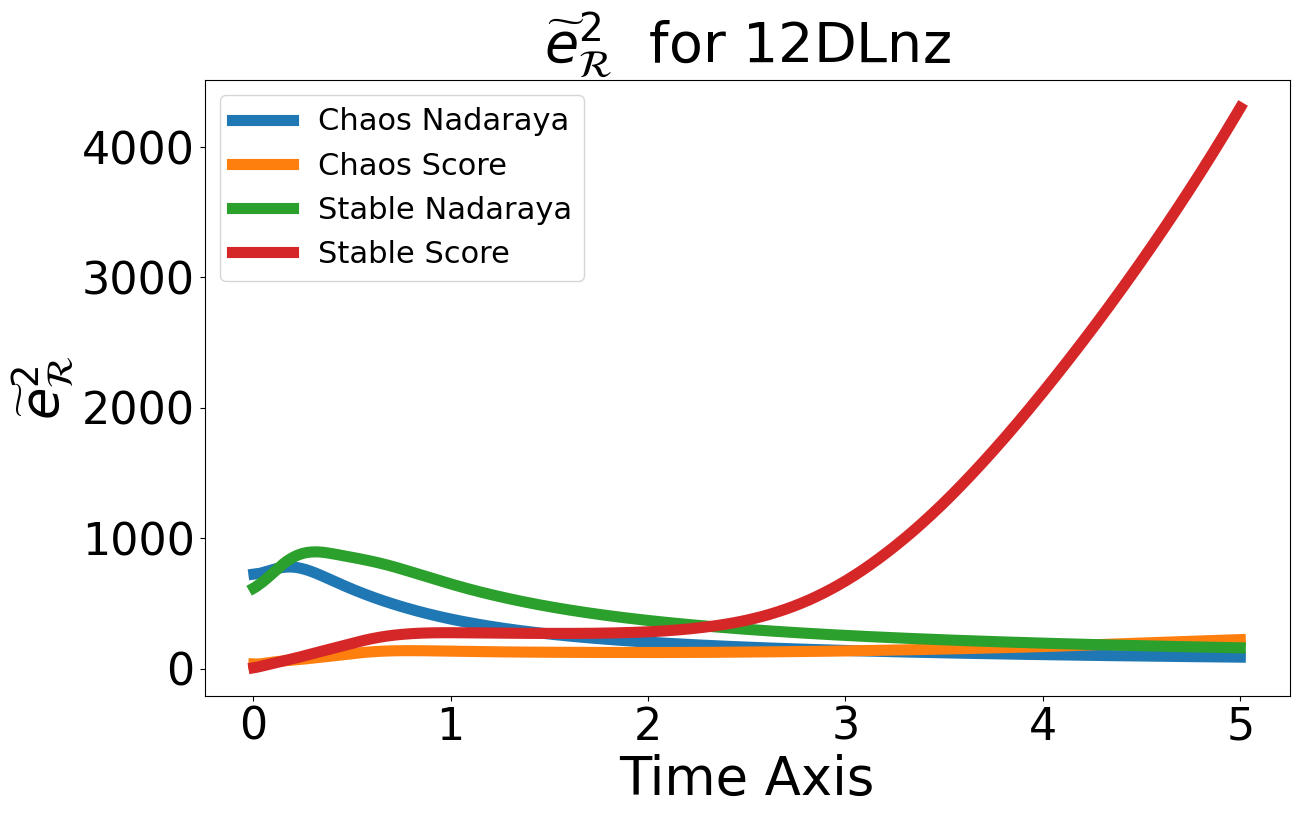

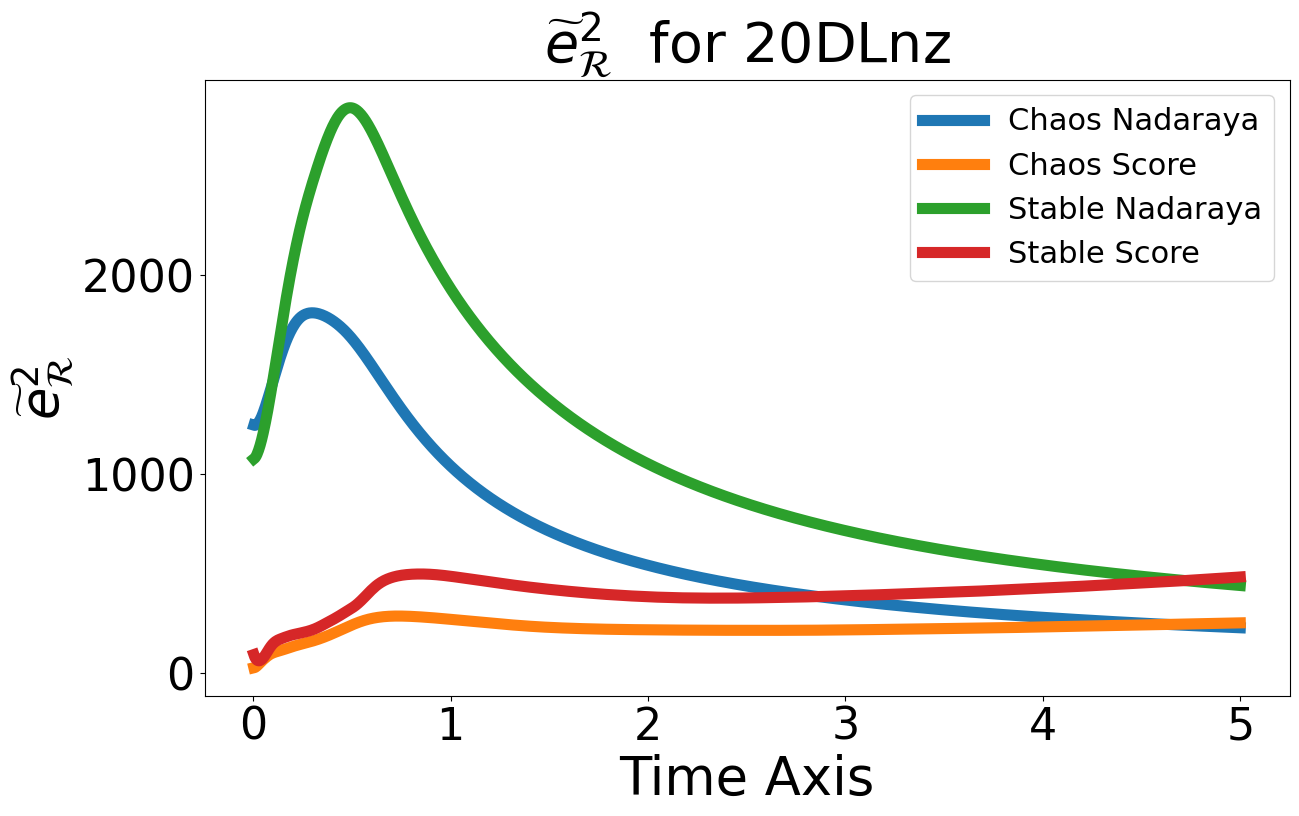

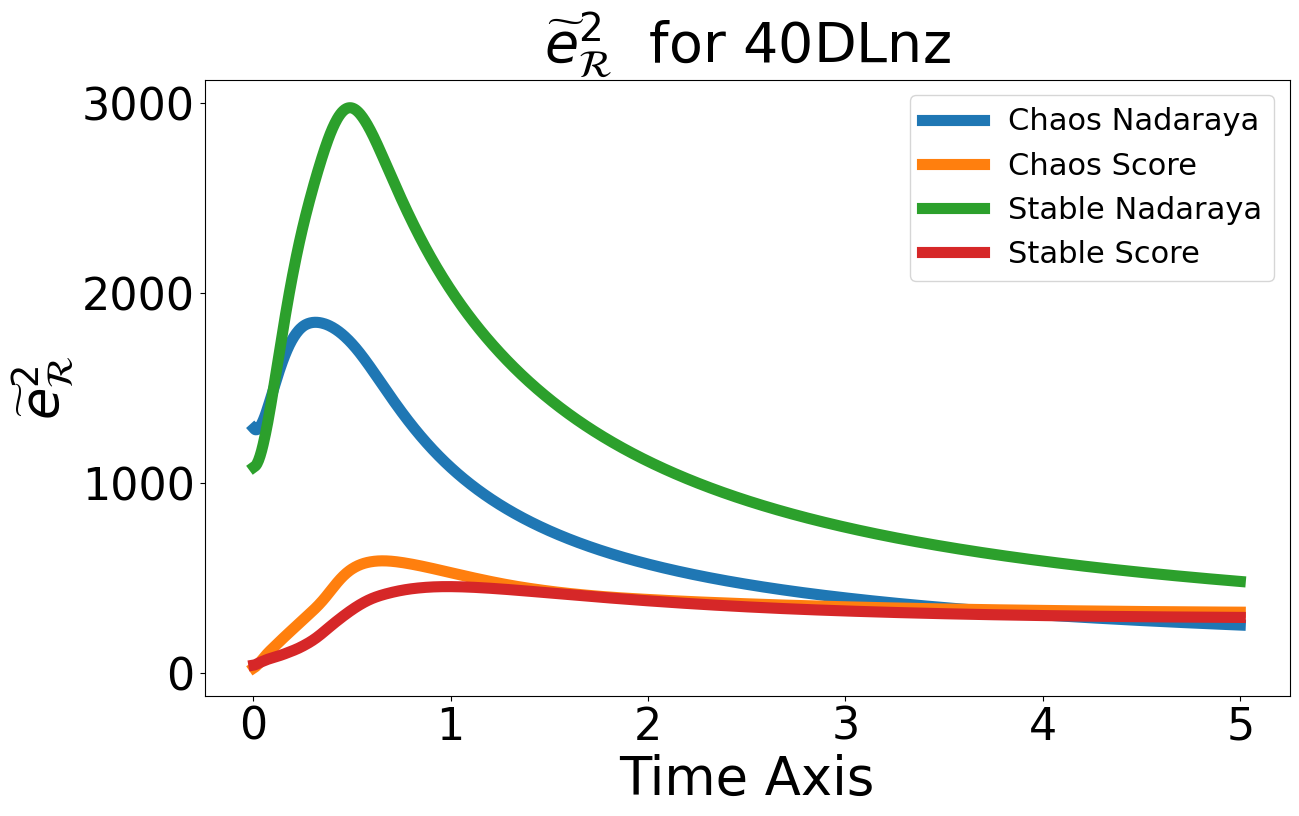

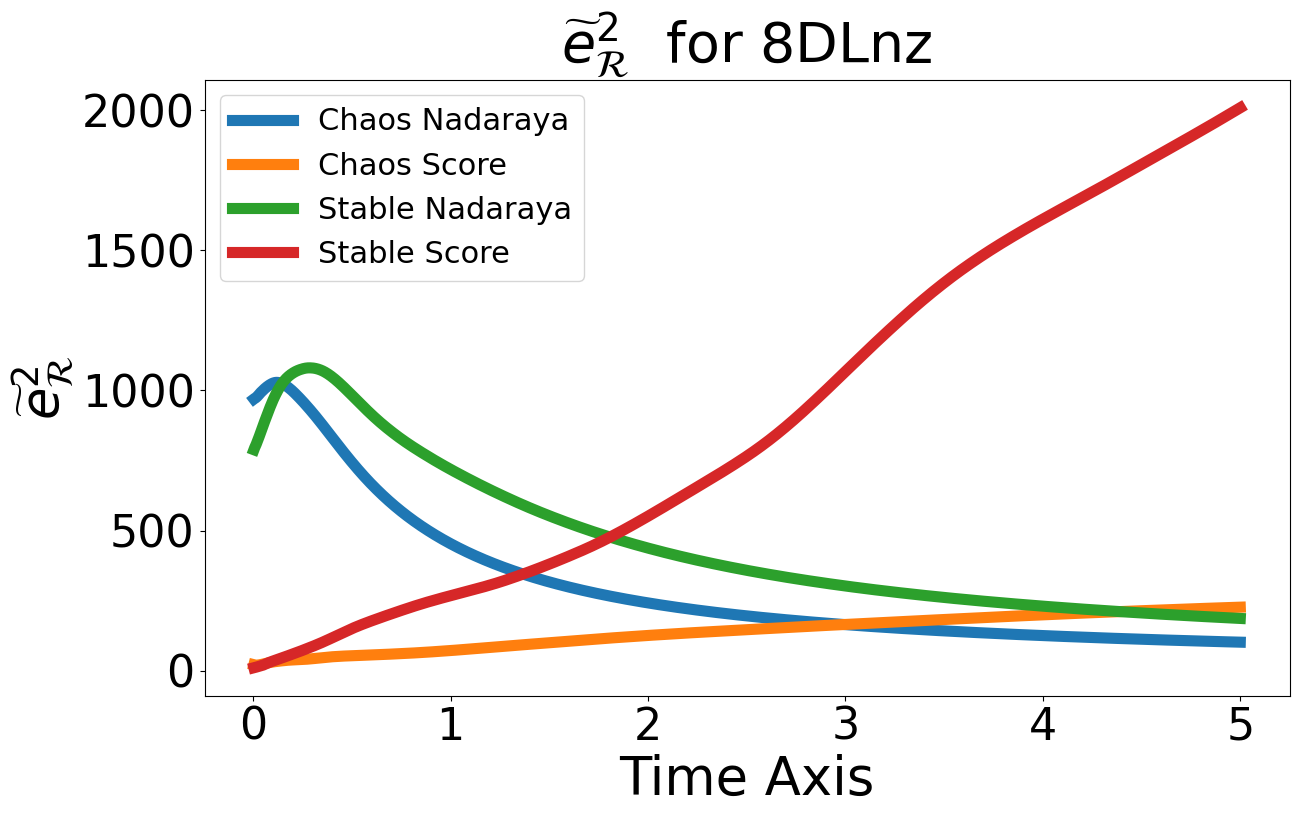

In [40]:
import matplotlib.pyplot as plt
for k in range(0, alt_law_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(14, 8))
    currevals = alt_law_eval.iloc[:, k:k+4]
    currevals.rename({d:d.split("DLnz")[-1].replace("True", "") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=8)
    plt.legend(fontsize=22)
    ax.tick_params(labelsize=32)
    plt.title(rf"$\widetilde{{e}}^{{2}}_{{\mathcal{{R}}}}$  for {alt_law_eval.columns[k].split('DLnz')[0]}DLnz", fontsize=40)
    plt.ylabel(rf"$\widetilde{{e}}^{{2}}_{{\mathcal{{R}}}}$", fontsize=38)
    plt.xlabel("Time Axis", fontsize=38)
    plt.show()
    plt.close()

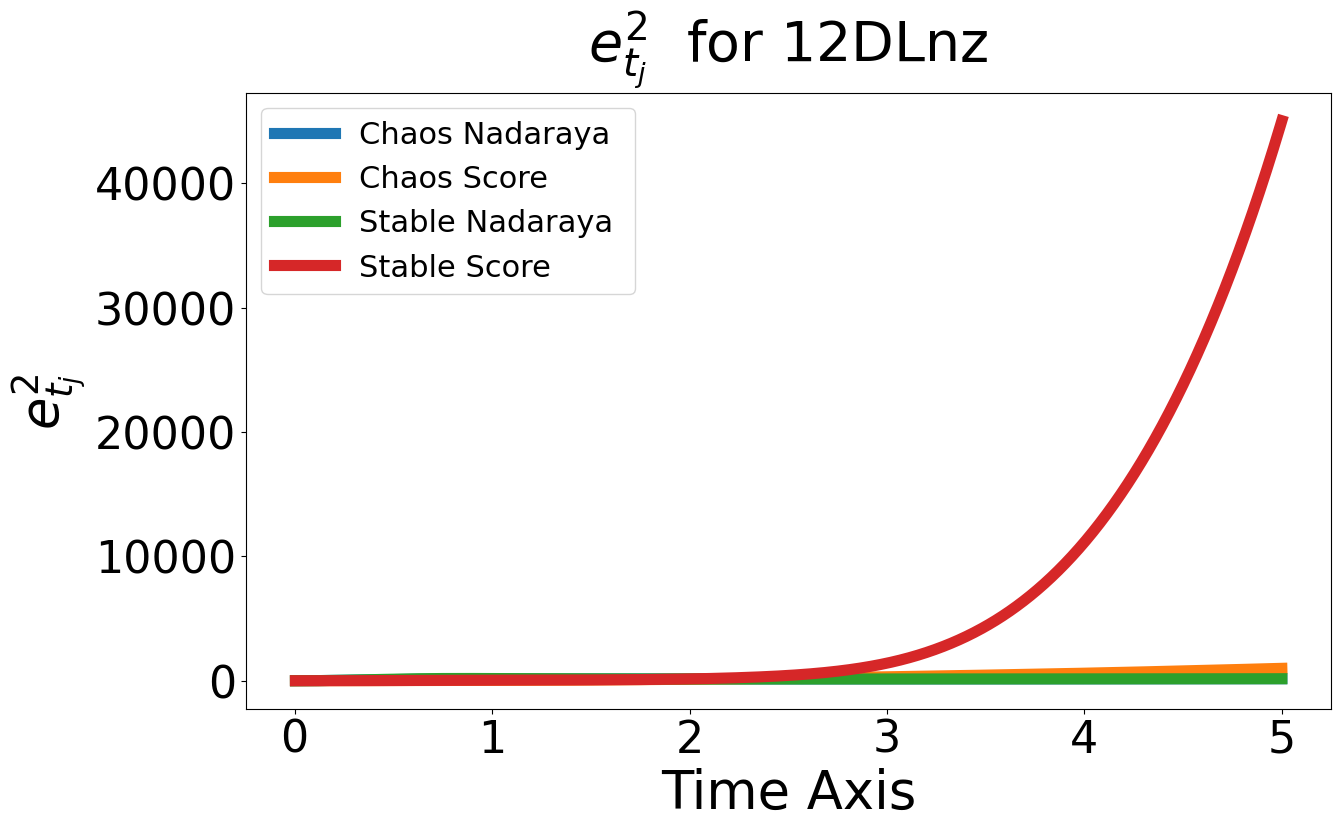

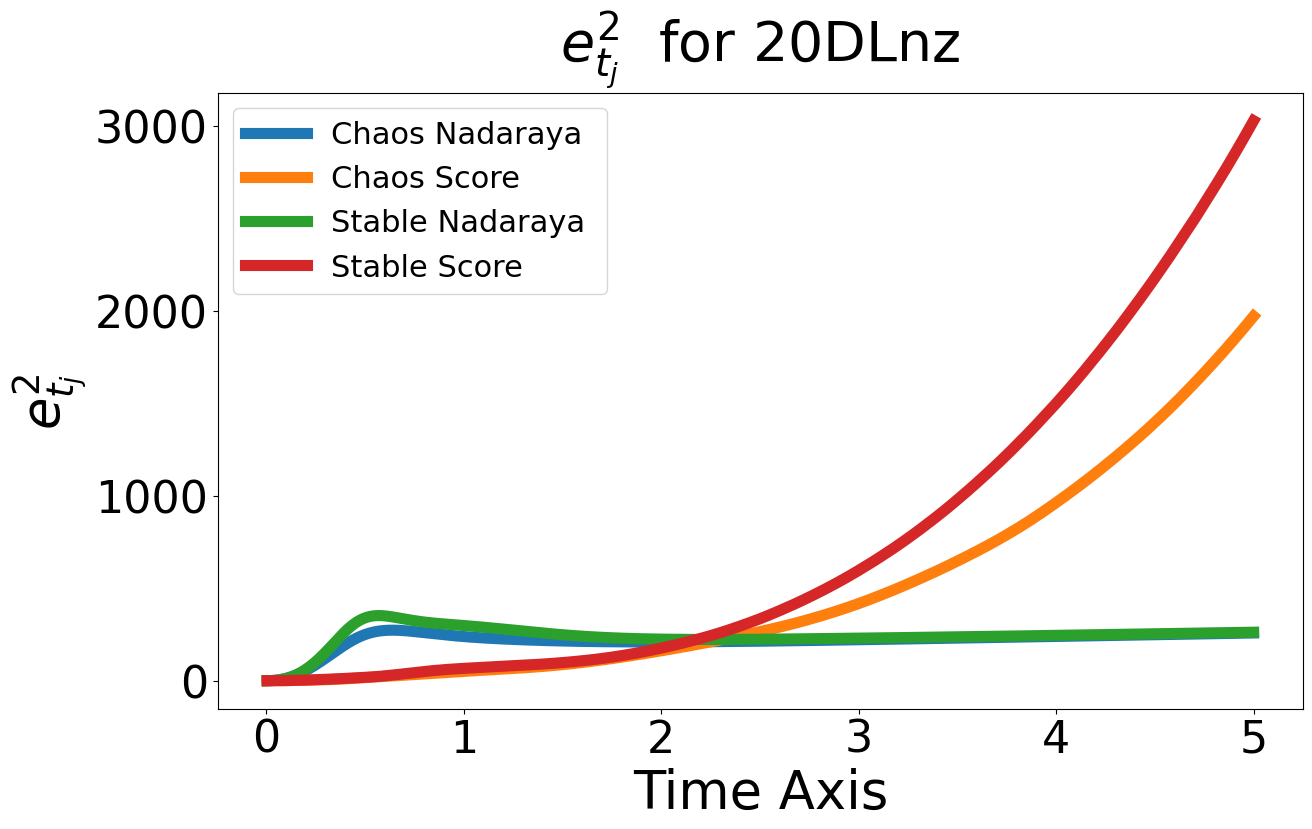

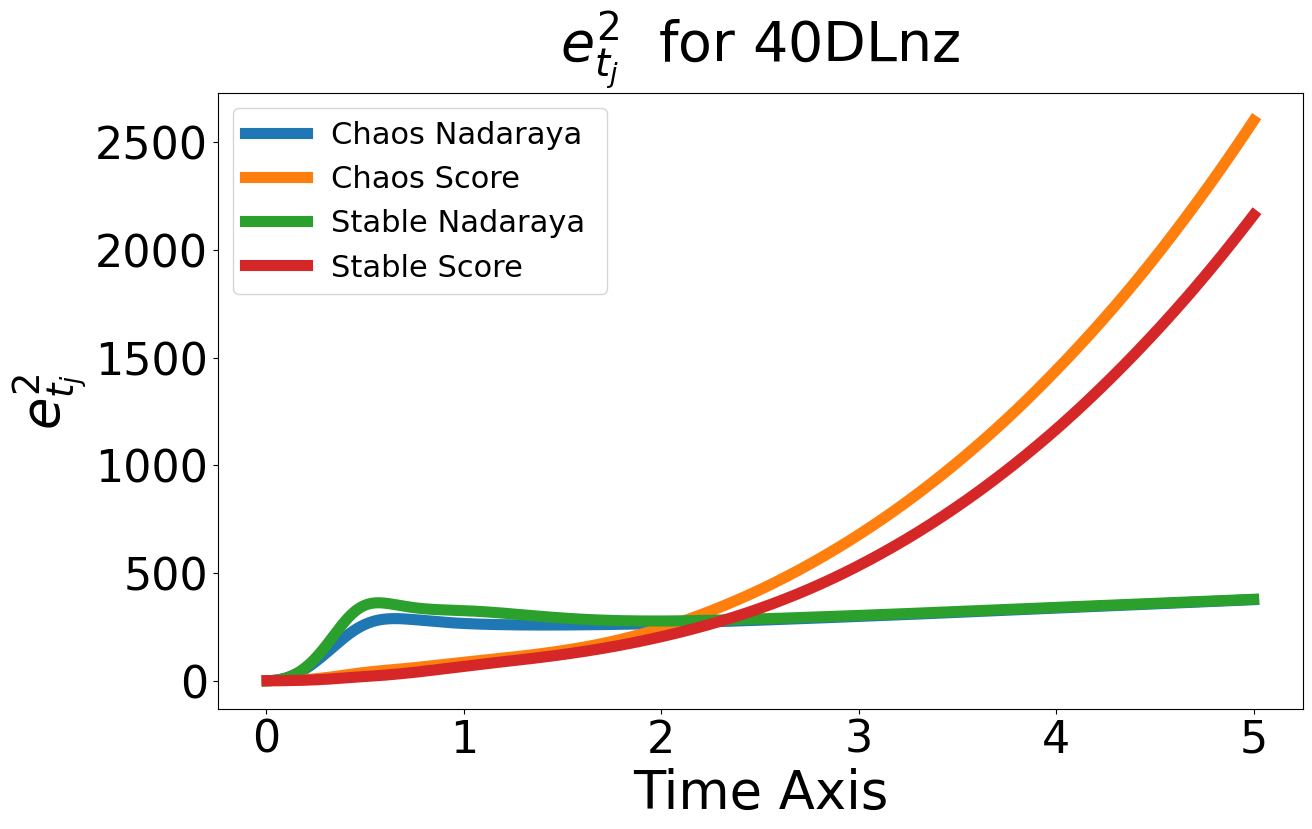

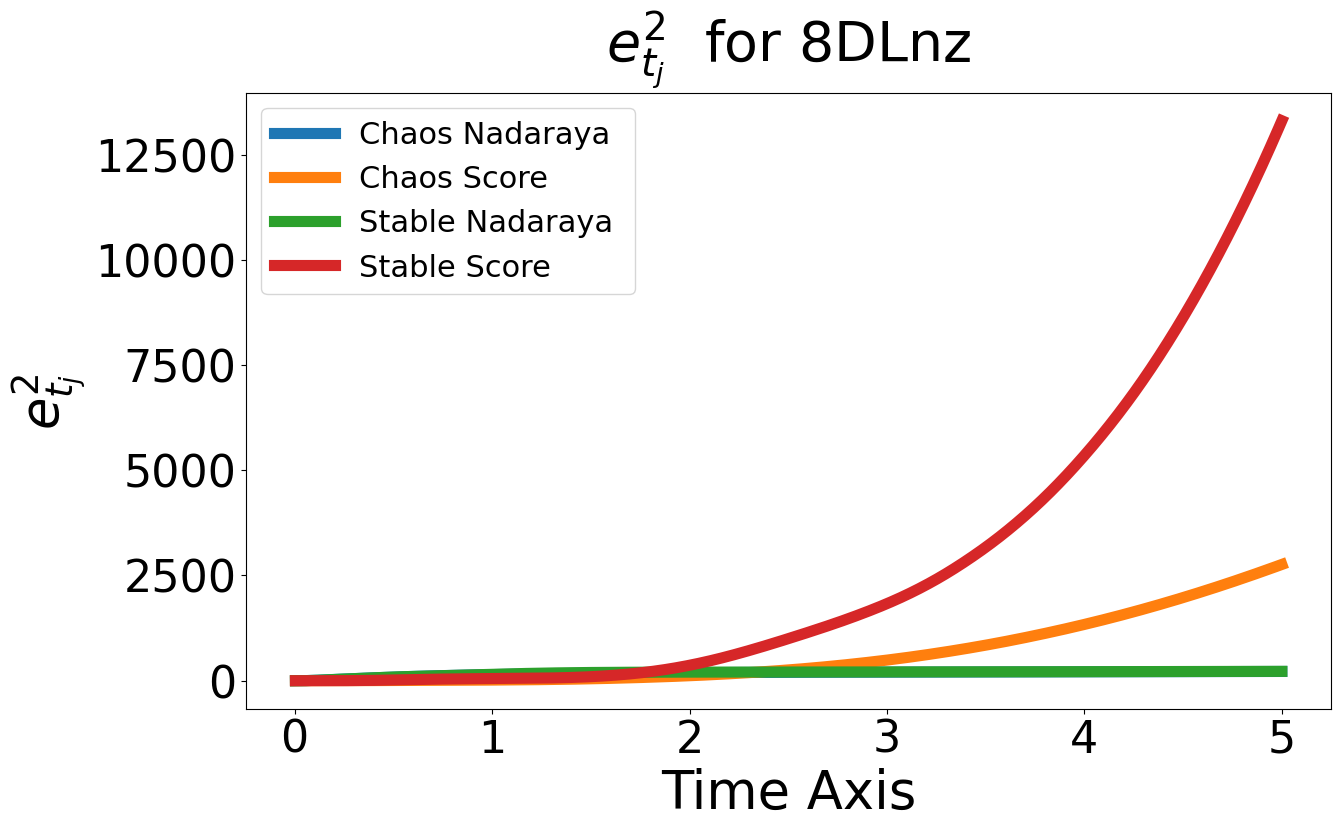

In [41]:
import matplotlib.pyplot as plt
for k in range(0, state_eval.shape[1], 4):
    fig, ax = plt.subplots(figsize=(14, 8))
    currevals = state_eval.iloc[:, k:k+4]**2
    currevals.rename({d:d.split("DLnz")[-1].replace("State", "") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=8)
    plt.legend(fontsize=22)
    ax.tick_params(labelsize=32)
    plt.title(rf"$e^{{2}}_{{t_j}}$  for {state_eval.columns[k].split('DLnz')[0]}DLnz", fontsize=40)
    plt.ylabel(rf"$e^{{2}}_{{t_j}}$", fontsize=38)
    plt.xlabel("Time Axis", fontsize=38)
    plt.show()
    plt.close()